Question 4 (a)

In [3]:
import numpy as np
from PIL import Image
import os
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import pandas as pd
from PIL import Image
import glob
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.mixture import GaussianMixture

import pandas as pd
import os
from sklearn.model_selection import train_test_split
directory = os.getcwd()

In [4]:
# --> import 
all_data = np.arange(77760)

for filename in glob.glob('yalefaces/*.*'): #assuming gif
    
    img=Image.open(filename)  #打开图像
    im = np.asarray(img,dtype='float64')
    im = np.ndarray.flatten(im)
    all_data = np.vstack([all_data, im])

DF = pd.DataFrame(data=all_data[0:,0:])  # 1st row as the column names
DF = DF.iloc[1:]

import sys
import numpy as np
pd.set_option('display.max_colwidth', -1)

np.set_printoptions(threshold=sys.maxsize)

test = np.arange(77760)

for index, X in DF.iterrows():
        
    X = (X - X.min())/(X.max()-X.min())
    X = X - X.mean()
    X = X.fillna(X.mean())
    
    test = np.vstack([test, X])

input_data = pd.DataFrame(data=test[1:,0:])    
input_data.shape    

(166, 77760)

In [12]:
test[0] 

0     -0.086900
1     -0.284658
2     -0.217159
3     -0.219498
4     -0.134718
         ...   
161   -0.288550
162   -0.242689
163   -0.170048
164   -0.257351
165   -0.211183
Name: 0, Length: 166, dtype: float64

Test the maximum value

In [60]:
test.iloc[165].max()

0.2803483290033276

In [55]:
test.to_csv(r'/Users/dior/Desktop/633/HW3/normalized_data.txt')

Begin PCA!!!

In [13]:


pca = PCA(n_components=30)
pca.fit(test)

X_trans = pca.transform(test)

eigenvalues = pca.explained_variance_

eigenvalues

array([1615.28823735,  593.6792751 ,  399.27440711,  260.21898268,
        224.27999051,  164.62334522,  135.25024074,  123.10439526,
        101.15823201,   74.00017122,   69.61269972,   59.30165133,
         49.54111534,   47.86329136,   44.34499499,   38.88939432,
         36.67278132,   34.86204326,   32.61326437,   28.63296241,
         26.35334954,   24.70338738,   22.65098775,   20.93287521,
         20.43627003,   19.3384709 ,   17.86031645,   16.69315501,
         15.68355232,   14.62747126])

1


In [105]:
index = np.arange(0, 30, 1)
index.size

30

In [104]:
eigenvalues.size

30

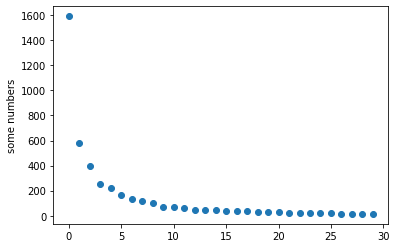

In [106]:
import matplotlib.pyplot as plt

plt.scatter(index,eigenvalues)

plt.ylabel('some numbers')

plt.show()

In [46]:
pca_all = PCA(n_components=165)
pca_all.fit(test)

X_trans_all = pca_all.transform(test)

eigenvalues_all = pca_all.explained_variance_

eigenfaces = pca_all.components_.reshape((165, 243, 320))

In [54]:
eigenfaces[1].shape

(243, 320)

In [131]:
index = np.arange(0, 165, 1)
index.size

165

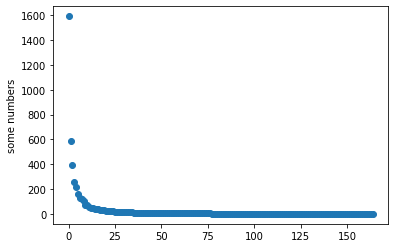

In [132]:
import matplotlib.pyplot as plt

plt.scatter(index,eigenvalues_all)

plt.ylabel('some numbers')

plt.show()

In [130]:
sum = 0 

for i in eigenvalues_all: 
    sum = sum + i
    
print("sum is " + str(sum))

count = 0 

half_energy = 0 
for i in eigenvalues_all: 
    
        half_energy = half_energy + i
        
        print(half_energy)
        
        if(half_energy > sum/2):
            count = count + 1
            print("50% energy from capturing : " + str(count) + " component")
            break
            
        count = count + 1
 


sum is 4704.075506937289
1591.2654718752708
2174.722873068933
2567.772734789077
50% energy from capturing : 3 component


#  Question 4 (c)
##  Question 4 (c)

In [72]:
pca_all = PCA(n_components=166)
pca_all.fit(test)

X_trans_all = pca_all.transform(test)

eigenvalues_all = pca_all.explained_variance_

eigenvetor_all = pca_all.components_

eigenfaces = pca_all.components_.reshape((166, 243, 320))

eigenfaces[0].shape

# Reference: https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html 

(243, 320)

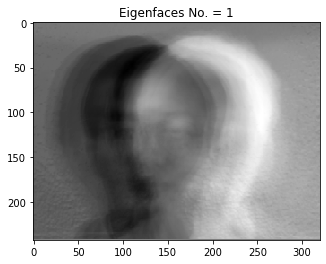

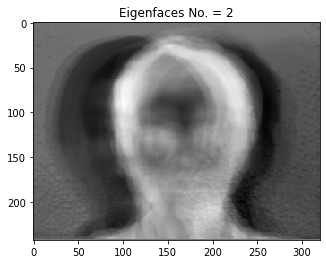

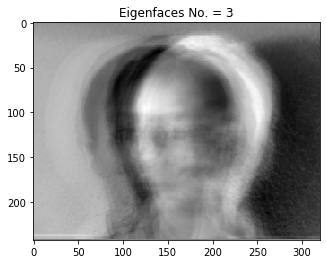

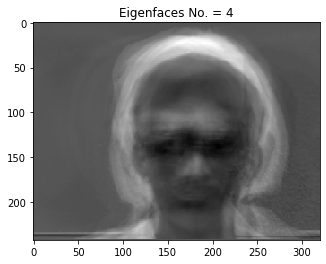

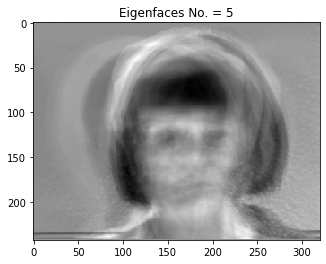

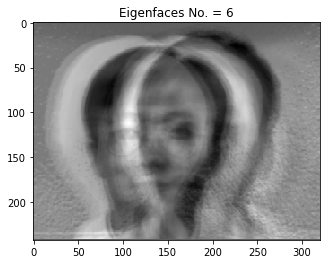

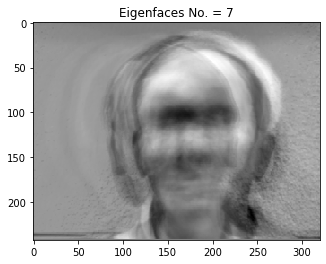

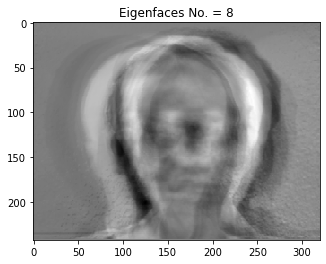

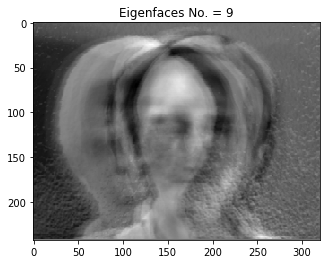

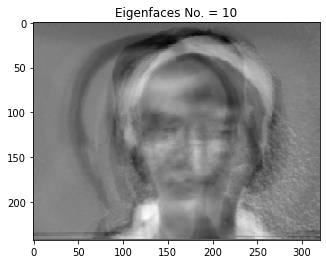

In [62]:
# m = (X_trans_all.transpose()).dot(test)
# m = m.transpose() 

for i in range(10): 
    plt.imshow(eigenfaces[i],cmap='gray')
    plt.title('Eigenfaces No. = {}'.format(1+i))
    plt.show()
 

# Question 4 (d)
## Question 4 (d)

In [7]:
pca_all = PCA(n_components=166)
pca_all.fit(input_data)

X_trans_all = pca_all.transform(input_data)

eigenvalues_all = pca_all.explained_variance_

eigen_Vector = pca_all.components_

eigenfaces = pca_all.components_.reshape((166, 243, 320))

eigen_Vector[1].shape

# Reference: https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html 

# c_k = original_normalized_data.transpose().dot(X_trans_all) 


(77760,)

input_data.iloc[0].shape = (77760,)
Z.shape = (1,)
(77760,)


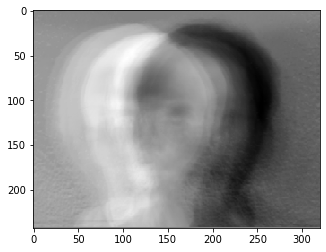

input_data.iloc[0].shape = (77760,)
Z.shape = (10,)
(77760,)


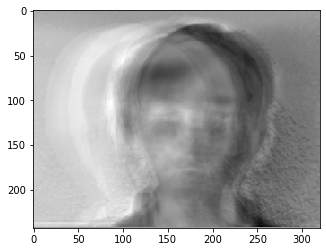

input_data.iloc[0].shape = (77760,)
Z.shape = (20,)
(77760,)


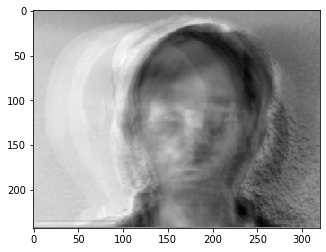

input_data.iloc[0].shape = (77760,)
Z.shape = (30,)
(77760,)


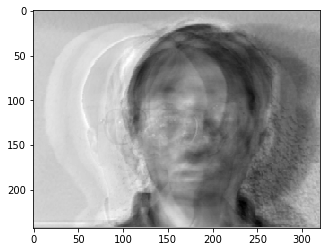

input_data.iloc[0].shape = (77760,)
Z.shape = (40,)
(77760,)


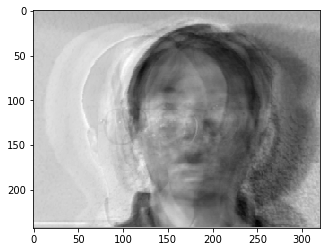

input_data.iloc[0].shape = (77760,)
Z.shape = (50,)
(77760,)


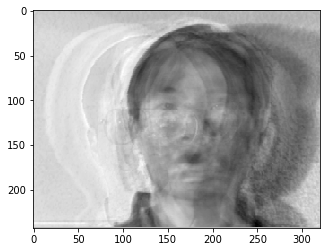

input_data.iloc[0].shape = (77760,)
Z.shape = (70,)
(77760,)


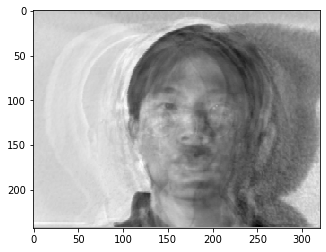

input_data.iloc[0].shape = (77760,)
Z.shape = (90,)
(77760,)


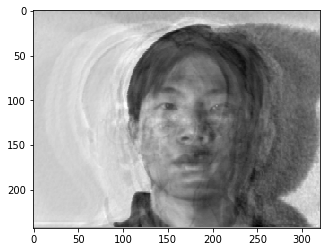

input_data.iloc[0].shape = (77760,)
Z.shape = (120,)
(77760,)


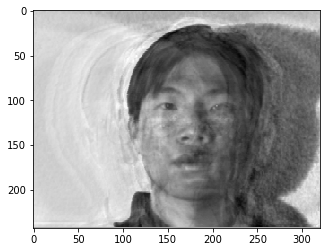

input_data.iloc[0].shape = (77760,)
Z.shape = (1,)
(77760,)


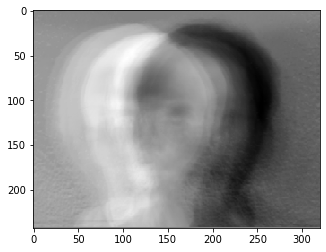

input_data.iloc[0].shape = (77760,)
Z.shape = (10,)
(77760,)


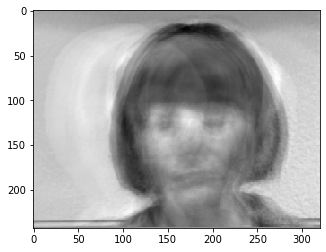

input_data.iloc[0].shape = (77760,)
Z.shape = (20,)
(77760,)


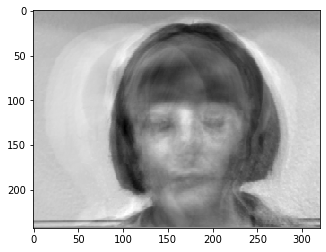

input_data.iloc[0].shape = (77760,)
Z.shape = (30,)
(77760,)


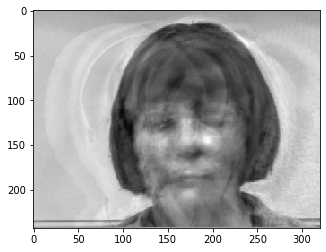

input_data.iloc[0].shape = (77760,)
Z.shape = (40,)
(77760,)


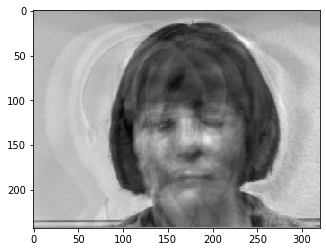

input_data.iloc[0].shape = (77760,)
Z.shape = (50,)
(77760,)


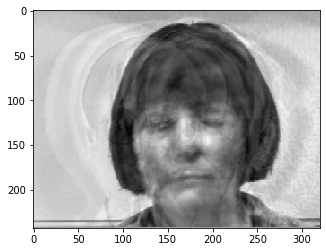

input_data.iloc[0].shape = (77760,)
Z.shape = (70,)
(77760,)


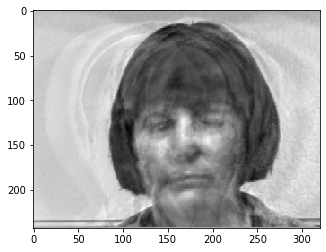

input_data.iloc[0].shape = (77760,)
Z.shape = (90,)
(77760,)


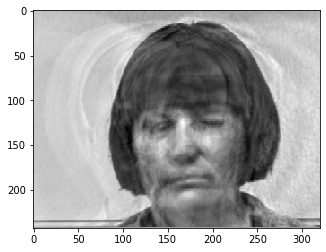

input_data.iloc[0].shape = (77760,)
Z.shape = (120,)
(77760,)


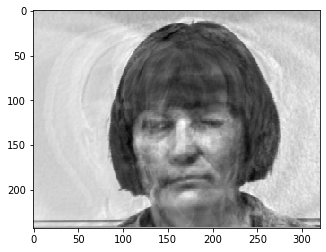

input_data.iloc[0].shape = (77760,)
Z.shape = (1,)
(77760,)


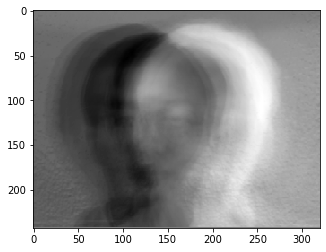

input_data.iloc[0].shape = (77760,)
Z.shape = (10,)
(77760,)


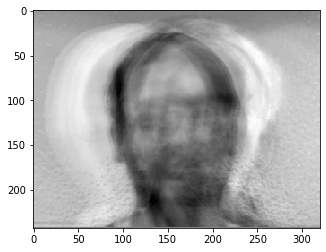

input_data.iloc[0].shape = (77760,)
Z.shape = (20,)
(77760,)


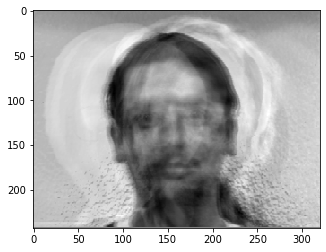

input_data.iloc[0].shape = (77760,)
Z.shape = (30,)
(77760,)


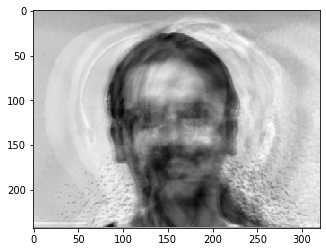

input_data.iloc[0].shape = (77760,)
Z.shape = (40,)
(77760,)


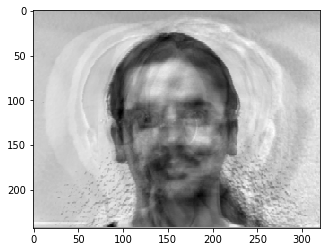

input_data.iloc[0].shape = (77760,)
Z.shape = (50,)
(77760,)


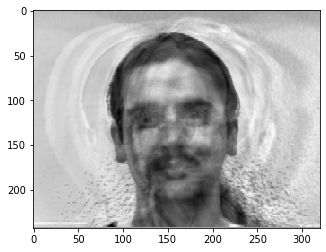

input_data.iloc[0].shape = (77760,)
Z.shape = (70,)
(77760,)


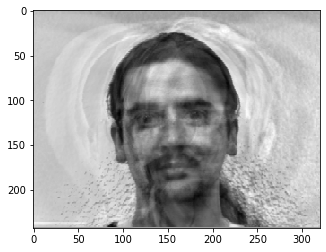

input_data.iloc[0].shape = (77760,)
Z.shape = (90,)
(77760,)


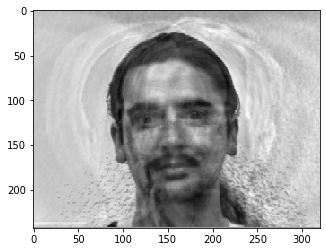

input_data.iloc[0].shape = (77760,)
Z.shape = (120,)
(77760,)


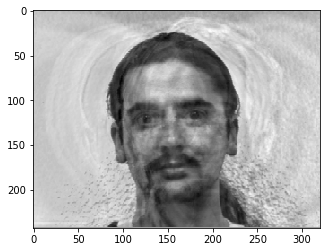

In [36]:
item = [1,10,20,30,40,50,70,90,120]

image_No = [0,50,100]

for k in image_No: 
    for i in item: 
        print("input_data.iloc[0].shape = " + str(input_data.iloc[0].shape))

        Z = np.dot(input_data.iloc[k],eigen_Vector[:i].transpose()) #PCA results, inp_arr[1] is the index of person.

        print("Z.shape = " + str(Z.shape))

        recon = np.dot(Z,eigen_Vector[:i]) #do reconstruction

        print(recon.shape)
        plt.imshow(recon.reshape((243,320)),cmap='gray')

        plt.show()

# Question 4 (e)
## Question 4 (e)

In [8]:
# --> import 
all_data = np.arange(77760)
all_label = []
for filename in sorted(glob.glob('yalefaces/*.*')): #assuming gif
    
    # print(filename)
    all_label.append(filename[20:])
    img=Image.open(filename)  #打开图像
    im = np.asarray(img,dtype='float64')
    im = np.ndarray.flatten(im)
    all_data = np.vstack([all_data, im])

DF = pd.DataFrame(data=all_data[0:,0:])  # 1st row as the column names
DF = DF.iloc[1:]

all_label = pd.DataFrame(all_label)


import sys
import numpy as np
pd.set_option('display.max_colwidth', -1)

np.set_printoptions(threshold=sys.maxsize)

test = np.arange(77760)

for index, X in DF.iterrows():
        
    X = (X - X.min())/(X.max()-X.min())
    X = X - X.mean()
    X = X.fillna(X.mean())
    
    test = np.vstack([test, X])

input_data = pd.DataFrame(data=test[1:,0:])    
input_data.shape    

(165, 77760)

In [4]:
a = "yalefaces/subject14.sad"
print(a[20:])

sad


In [164]:
nComp = [1,10,20,30,40,50]

for item in nComp:
    Z = np.dot(inp_arr[0],U[:,:item]) #PCA results, inp_arr[1] is the index of person.
    # print(Z.shape)
    recon = np.dot(Z,U[:,:item].T) #do reconstruction
    # print(recon.shape)
    plt.imshow(recon.reshape((160,160)),cmap='gray')
    plt.show()

NameError: name 'inp_arr' is not defined

In [26]:
def num_to_string(num):
    numbers = {
        0 : "glasses",
        1 : "happy",
        2 : "leftlight",
        3 : "noglasses",
        4 : "centerlight",
        5 : "normal",
        6 : "rightlight",
        7 : "sad",
        8 : "sleepy",
        9 : "surprised",
        10 : "wink"
    }
    
    return numbers.get(num, None)

print(num_to_string(2))
print(num_to_string(5)) 


leftlight
normal


In [210]:
print(10)

10


In [39]:
all_label = pd.DataFrame(all_label)

### Prepare the dataset which inlcudes all persons' data

In [285]:
i = 0 
j = 11
 
X_train_all = np.arange(77760)
X_test_all  = np.arange(77760)
y_train_all = np.arange(1)
y_test_all  = np.arange(1)

for k in range(15):  # for 15 people 

    X_train, X_test, y_train, y_test = train_test_split(
                                                     input_data[0:11], 
                                                     all_label[0:11], 
                                                     test_size=0.25, 
                                                     random_state=0,
                                                    )
    j = j + 11
    i = i + 11
 
    X_train_all = np.vstack([X_train_all, X_train])
    X_test_all = np.vstack([X_test_all, X_test])
    y_train_all = np.vstack([y_train_all, y_train])
    y_test_all = np.vstack([y_test_all, y_test])
    
X_train_all = pd.DataFrame(data=X_train_all[1:,0:])
X_test_all = pd.DataFrame(data=X_test_all[1:,0:])
y_train_all = pd.DataFrame(data=y_train_all[1:,0:])
y_test_all = pd.DataFrame(data=y_test_all[1:,0:])    

In [314]:
print("X_train_all.shape = " + str(X_train_all.shape))
print("X_test_all.shape = " + str(X_test_all.shape))
print("y_train_all.shape = " + str(y_train_all.shape))
print("y_test_all.shape = " + str(y_test_all.shape))

X_train_all.shape = (120, 77760)
X_test_all.shape = (45, 77760)
y_train_all.shape = (120, 1)
y_test_all.shape = (45, 1)


### pca

In [288]:
n_components = 50
 
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train_all)

eigenfaces = pca.components_.reshape((n_components, 243, 320))

print("Projecting the input data on the eigenfaces orthonormal basis")
 
X_train_pca = pca.transform(X_train_all)
X_test_pca = pca.transform(X_test_all)

print(1)

Projecting the input data on the eigenfaces orthonormal basis
1


In [289]:
print("Fitting the classifier to the training set")
 
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

clf = GridSearchCV( SVC(kernel='rbf', class_weight='balanced'),param_grid, cv=5, iid=False )


Fitting the classifier to the training set


In [291]:
clf = clf.fit(X_train_pca, y_train_all.values.ravel())
 
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [305]:
print("Predicting face")
 
y_pred = clf.predict(X_test_pca)
 

Predicting face


In [306]:
y_pred = pd.DataFrame(y_pred)

In [178]:
y_test

,0
0,noglasses
1,surprised
2,happy
0,noglasses
1,surprised
2,happy
0,noglasses
1,surprised
2,happy
0,noglasses


In [109]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

NameError: name 'target_names' is not defined

# PAC with another approach 

In [ ]:
y = all_label;
X = input_data;
  
def cross_validate_svd(c, n):

    accuracy = 0
    
    skf = StratifiedKFold( n_splits= 5, shuffle=True )
        
    for train_index, test_index in skf.split(X, y):
   
        X_train, X_test = X.transpose()[train_index], X.transpose()[test_index]
     
        y_train, y_test = y.transpose()[train_index], y.transpose()[test_index]
      
        # --> PCA
        P_train,_,_ = LA.svd(X_train.transpose())
        P_test,_,_  = LA.svd(X_test.transpose())
        
        pca_train = np.dot(X_train, P_train[:,:n+1])
        pca_test = np.dot(X_test, P_test[:,:n+1])
        
        # --> SVM
        svm = SVC(kernel= 'radial',C = c) 
        
        svm.fit(pca_train, y_train)
        
        pred = svm.predict(pca_test) 

        accuracy = accuracy + accuracy_score(y_test, pred)/5
        
        print(77)
        
    return accuracy

cross_validate_svd(15,50)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


# Adaboost a bit

In [ ]:
y = all_label;
X = input_data;
    
def cross_validate_ada(c, n):

    accuracy = 0
    
    skf = StratifiedKFold( n_splits= 5, shuffle=True )
        
    for train_index, test_index in skf.split(X, y):
   
        X_train, X_test = X.transpose()[train_index], X.transpose()[test_index]
     
        y_train, y_test = y.transpose()[train_index], y.transpose()[test_index]
      
        # --> PCA
        P_train,_,_ = LA.svd(X_train.transpose())
        P_test,_,_  = LA.svd(X_test.transpose())
        
        pca_train = np.dot(X_train, P_train[:,:n+1])
        pca_test = np.dot(X_test, P_test[:,:n+1])
  
        # --> SVM
        svm = SVC(kernel= 'radial',C = c) 
        
        svm.fit(pca_train, y_train)
        pred = svm.predict(pca_test) 

        k = 0
        for i in range(len(pred)):
            if pred[i] == y_test[i]:
                k = k + 1
    
        accuracy = accuracy + accuracy_score(y_test, pred)/5
        
    return accuracy

cross_validate_ada(15,50)

# --> Q4(f)

In [27]:
all_ims = os.listdir("/Users/dior/Desktop/633/HW3/yalefaces")
print(all_ims)

['subject04.leftlight', 'subject01.wink', 'subject06.surprised', 'subject07.glasses', 'subject15.rightlight', 'subject12.surprised', 'subject10.leftlight', 'subject06.happy', 'subject03.centerlight', 'subject09.rightlight', 'subject01.normal', 'subject09.leftlight', 'subject13.normal', 'subject04.happy', 'subject14.noglasses', 'subject15.sleepy', 'subject04.rightlight', 'subject07.sleepy', 'subject11.normal', 'subject13.centerlight', 'subject03.normal', 'subject02.leftlight', 'subject05.sleepy', 'subject01.rightlight', 'subject14.surprised', 'subject09.sleepy', 'subject01.centerlight.gif', 'subject06.glasses', 'subject02.happy', 'subject12.noglasses', 'subject10.rightlight', 'subject06.noglasses', 'subject09.sad', 'subject06.centerlight', 'subject08.sad', 'subject13.sleepy', 'subject13.surprised', 'subject11.leftlight', 'subject05.happy', 'subject05.leftlight', 'subject05.centerlight', 'subject07.surprised', 'subject01.sleepy', 'subject07.normal', 'subject15.normal', 'subject07.wink', 

In [28]:
data = []

for title in os.listdir("/Users/dior/Desktop/633/HW3/yalefaces"):
    
    if not title.endswith('.ipynb_checkponts'):
        row = {}
        row['f'] = title
        row['s'] = title.split('.')[0]
        row['e'] = title.split('.')[1]
        data.append(row)
        
data = pd.DataFrame.from_records(data)

data['e'].value_counts()

happy          15
centerlight    15
normal         15
noglasses      15
wink           15
sad            15
sleepy         15
glasses        15
leftlight      15
rightlight     15
surprised      15
Name: e, dtype: int64

In [41]:
e = {
         'leftlight' : 0, 
         'happy' : 1,
         'normal' : 2,
         'surprised' : 3,
         'gif' : 4, 
         'noglasses' : 5,
         'sad' : 6,
         'glasses' : 7,
         'rightlight' : 8, 
         'sleepy' : 9, 
         'centerlight' : 10, 
         'wink' :11
    }
 
data['e'] = [ e[item] for item in data['e'] ]

#split 
train, test = train_test_split(data.e, test_size=0.1)
y_train, y_test = [], []

for item in train:
    y_train.append(item)

for item in test:
    y_test.append(item)

x_train_d = list(np.array(train.values.tolist()).reshape(-1,1))
x_test_d = list(np.array(test.values.tolist()).reshape(-1,1))

gau = GaussianMixture(n_components=11).fit(x_train_d,y_train_d)

pred = gau.predict(x_test_d)

k = 0

for i in range(len(pred)):
    if y_test[i] == pred[i]:
        k = k + 1
        
print('result!!')
print((accuracy_score(pred, y_test))*100)

KeyError: 7

In [1]:
print(2)

2
